# Bài tập OpenCV cơ bản

Notebook này thực hiện các yêu cầu sau:
1. Kiểm tra opencv-python.
2. Đọc và hiển thị ảnh bằng matplotlib.
3. Đọc ảnh bằng OpenCV, kiểm tra kích thước.
4. Hiển thị ảnh OpenCV bằng plt.imshow và nhận xét.
5. Khắc phục lỗi hiển thị màu (đảo chiều matrix, convert color).
6. Phóng to ảnh.
7. Crop ảnh.
8. Ghép ảnh dọc và ngang.

In [1]:
import sys
import importlib.util

# 1. Kiểm tra xem opencv-python đã được cài chưa
package_name = 'cv2'
if package_name in sys.modules:
    print(f"{package_name} is already imported")
elif importlib.util.find_spec(package_name) is not None:
    print(f"{package_name} is installed")
else:
    print(f"{package_name} is NOT installed")
    # !pip install opencv-python

cv2 is installed


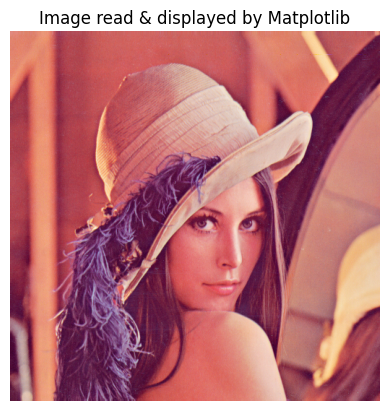

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Đường dẫn ảnh (sử dụng ảnh có sẵn trong cùng thư mục)
# Bạn có thể thay đổi tên file này thành ảnh bạn muốn
image_path = 'lenna.png' # Ví dụ sử dụng lenna.png

# 2. Để đọc ảnh và hiển thị ảnh, ta dùng matplotlib
# Matplotlib thường đọc ảnh dưới dạng RGB
try:
    img_plt = plt.imread(image_path)
    plt.imshow(img_plt)
    plt.axis('off')
    plt.title("Image read & displayed by Matplotlib")
    plt.show()
except FileNotFoundError:
    print(f"Không tìm thấy file {image_path}. Hãy chắc chắn ảnh nằm cùng thư mục.")

In [3]:
# 2. Kiểm tra xem opencv đọc ảnh như thế nào? Hiển thị chiều của ảnh?
img_cv = cv2.imread(image_path)

if img_cv is None:
    print("Không thể đọc ảnh bằng OpenCV. Kiểm tra lại đường dẫn.")
else:
    print("Loại dữ liệu:", type(img_cv))
    print("Shape (Chiều cao, Chiều rộng, Kênh màu):", img_cv.shape)
    # OpenCV đọc ảnh channel first hay last? -> (H, W, C) -> Channel last.

Loại dữ liệu: <class 'numpy.ndarray'>
Shape (Chiều cao, Chiều rộng, Kênh màu): (512, 512, 3)


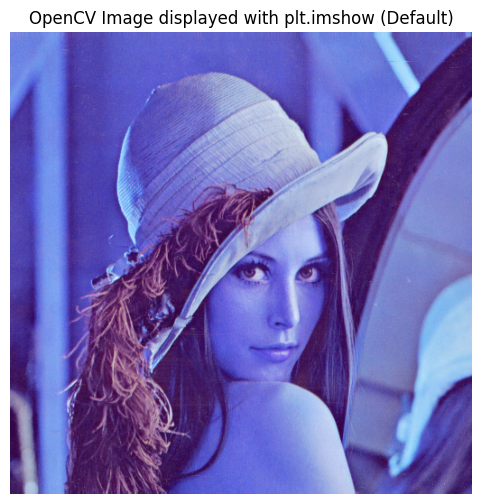

In [4]:
# 3. Show hình ảnh ra cho trực quan, sử dụng plt.imshow.
if img_cv is not None:
    plt.figure(figsize=(6,6))
    plt.imshow(img_cv)
    plt.title("OpenCV Image displayed with plt.imshow (Default)")
    plt.axis('off')
    plt.show()

# Nhận xét: 
# Bức ảnh hiển thị có màu sắc khác lạ (thường ám xanh dương - Blue).
# Lý do: OpenCV mặc định đọc ảnh theo thứ tự kênh màu BGR (Blue-Green-Red).
# Trong khi đó, Matplotlib (và hầu hết các thư viện hiển thị khác) mong đợi định dạng RGB (Red-Green-Blue).

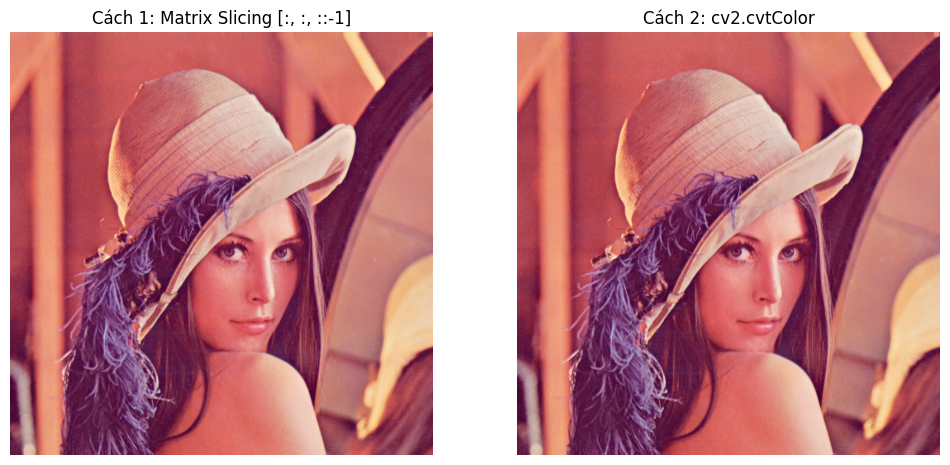

In [5]:
# Có cách nào để hiển thị đúng hay không?

# Cách 1: Đảo chiều matrix (Slicing)
# Đảo ngược thứ tự các kênh màu từ BGR -> RGB
img_rgb_method1 = img_cv[:, :, ::-1]

# Cách 2: Convert các chế độ màu sử dụng cv2.cvtColor
img_rgb_method2 = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

# Hiển thị lại
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb_method1)
plt.title("Cách 1: Matrix Slicing [:, :, ::-1]")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_method2)
plt.title("Cách 2: cv2.cvtColor")
plt.axis('off')

plt.show()

Original Dimensions: (512, 512)
Zoomed Dimensions: (1024, 1024)


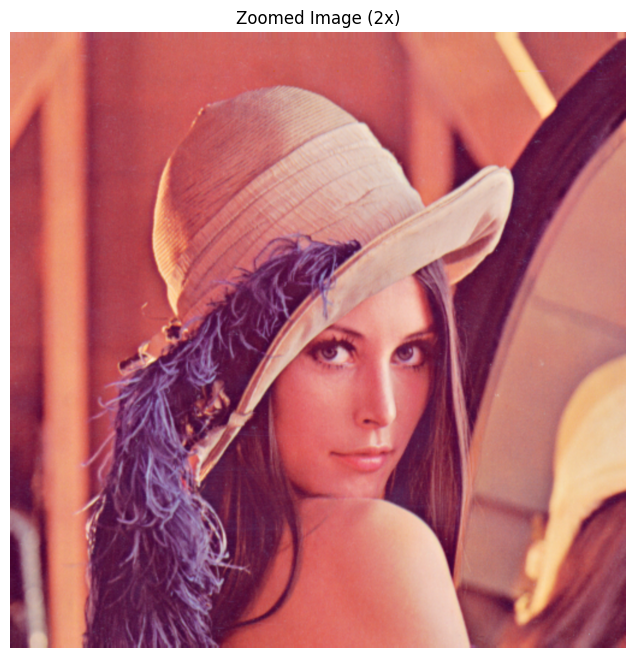

In [6]:
# 4. Nếu muốn phóng to ảnh thì chúng ta làm gì?
# Chúng ta dùng hàm cv2.resize

# Lấy kích thước hiện tại
height, width = img_cv.shape[:2]

# Muốn phóng to gấp đôi
new_width = width * 2
new_height = height * 2
new_dim = (new_width, new_height)

# Resize
# interpolation là phương pháp nội suy. INTER_LINEAR là mặc định, INTER_CUBIC cho chất lượng tốt hơn khi phóng to.
zoomed_img = cv2.resize(img_cv, new_dim, interpolation=cv2.INTER_LINEAR)

print("Original Dimensions:", (width, height))
print("Zoomed Dimensions:", zoomed_img.shape[:2])

# Hiển thị (nhớ chuyển sang RGB để nhìn màu cho đúng)
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(zoomed_img, cv2.COLOR_BGR2RGB))
plt.title("Zoomed Image (2x)")
plt.axis('off')
plt.show()

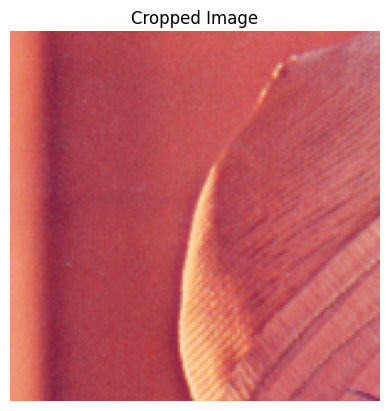

In [7]:
# 5. Nếu muốn crop ảnh thì chúng ta làm gì?
# Ảnh trong OpenCV là numpy array, nên ta dùng slicing để cắt.
# Cú pháp: image[y_start:y_end, x_start:x_end]

# Ví dụ: Cắt một vùng hình vuông 150x150 từ góc trái trên (hoặc vị trí bất kỳ)
x_start, y_start = 50, 50
w_crop, h_crop = 150, 150

cropped_img = img_cv[y_start:y_start+h_crop, x_start:x_start+w_crop]

plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.axis('off')
plt.show()

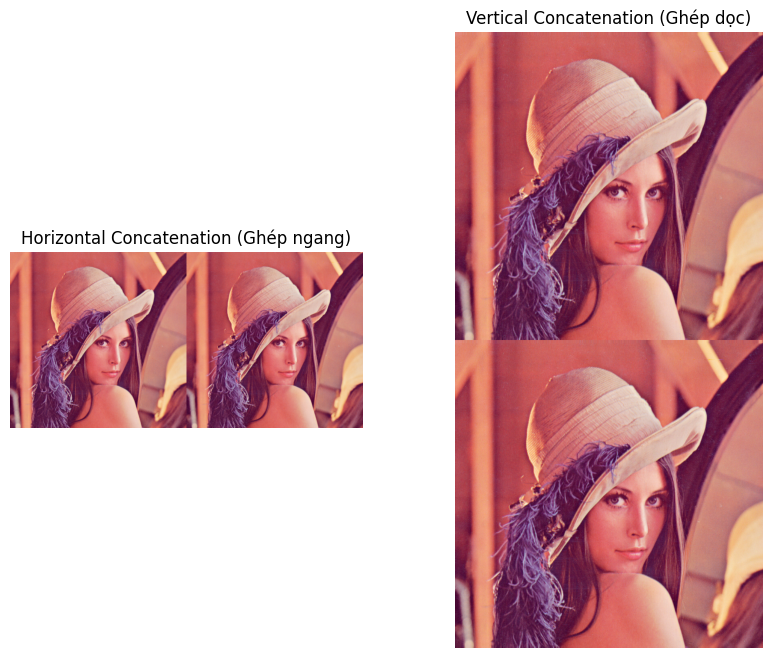

In [8]:
# 6. Ghép dọc và ghép ngang 2 bức ảnh.
# Ta có thể dùng cv2.vconcat (dọc), cv2.hconcat (ngang) 
# hoặc dùng numpy: np.vstack, np.hstack

# Để đảm bảo kích thước khớp nhau, ta sẽ ghép ảnh gốc với chính nó (hoặc resize ảnh khác về cùng kích thước cạnh ghép)

# Ghép ngang (Horizontal - nối tiếp theo chiều rộng)
img_h = cv2.hconcat([img_cv, img_cv])

# Ghép dọc (Vertical - nối tiếp theo chiều cao)
img_v = cv2.vconcat([img_cv, img_cv])

# Hiển thị
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_h, cv2.COLOR_BGR2RGB))
plt.title("Horizontal Concatenation (Ghép ngang)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_v, cv2.COLOR_BGR2RGB))
plt.title("Vertical Concatenation (Ghép dọc)")
plt.axis('off')

plt.show()